# Hands-on OpenCV

## Description :

This chapter is the base of feild computer vision. After going through this notebook you will get know what all image processing techiques are there and how you can apply them to build your own simple computer vision application.

## Overview

- Introduction to OpenCV
- Getting started with Images
- Image basics
- Image Processing
- Object detection

## Pre - requisites

- Python
- Numpy
- Matplotlib

## Learning Outcomes

- Image processing 
- Object detection






# Chapter 1: Introduction to OpenCV

Look around you what you can see with the help of your eyes is a visual perception of an environment around you. There is ton of learning and understanding happening with the ability of human beings being able to percieve visually and interact with the environment present around that individual.Machines such as computer are unable to understand and interact with the environment around them but then if we can combine the computational power of computer and provide them the ability to interact with visual data generated everyday a lot of complex scenarios which happen in real world can be solved. Which is why there is a constant effort to provide such functionalities and resources bundled up in a library. OpenCV is such kind of library that we are talking about.

***

### 1.1 What is OpenCV?

<img src="images/opencv-logo.png" width="250px"/>

>OpenCV (Open source computer vision) is an open source dedicated computer vision and machine learning software library. It aims to provide image and video analysis functionalities to build applications related to the field of computer vision. It includes a comprehensive set of both classic and state-of-the-art computer vison and machine learning algorithm implementations.Over the years with the help of OpenCV computers are now able to perform tasks such as detect and recognize faces, identify objects, classify human actions in videos, track camera movements, track moving objects, extract 3D models of objects, produce 3D point clouds from stereo cameras, stitch images together to produce a high resolution image of an entire scene and a lot more.





**Description :This section will comprise of getting familiar with basic operations in the visual data domain like how to load an image, how to display it and how to write the image on disk.**

### 1.2 Reading, displaying and writing an image
***

Visual data can be majorily perceived in terms of images and videos. So in order to make a sense of this data we should know how to access it in the first place. Let's take a look at how we can load an image off disk, display it on our screen.


We can use the function `cv2.imread()` to read an image. This function contains two arguments.

**First argument**- The image should be in the working directory or a full path of image should be given.

**Second argument** is a flag which specifies the way image should be read.

- cv2.IMREAD_COLOR : Loads a color image. Any transparency of image will be neglected. It is the default flag.
- cv2.IMREAD_GRAYSCALE : Loads image in grayscale mode
- cv2.IMREAD_UNCHANGED : Loads image as such including alpha channel

Instead of these three flags, you can simply pass integers 1, 0 or -1 respectively.


**Pythonic implementation of how to read an image**

```Python
# Loading neccessary libraries 
import numpy as np
import cv2
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline

# Load an colour image in grayscale mode
img = cv2.imread('./images/messi5.jpg', 0)
img.setflags(write = 1) #write access given

#checking the data is being loaded properly
print(type(img))


Output : <class 'numpy.ndarray'>

```
Now let's move on how to display an image by using OpenCV.
Use the function `cv2.imshow()` to display an image in a window. The window automatically fits to the image size.

First argument is a window name which is a string. second argument is our image. You can create as many windows as you wish, but with different window names.

`cv2.waitKey()` is a keyboard binding function. Its argument is the time in milliseconds. The function waits for specified milliseconds for any keyboard event. If you press any key in that time, the program continues. If 0 is passed, it waits indefinitely for a key stroke. It can also be set to detect specific key strokes like, if key a is pressed etc which we will discuss below.

`cv2.destroyAllWindows()` simply destroys all the windows we created. If you want to destroy any specific window, use the function `cv2.destroyWindow()` where you pass the exact window name as the argument.

**Pythonic Implementation of how to display an image in OpenCV**

```python
cv2.imshow(img) #using imshow funtionality of opencv to display an image
cv2.waitKey(0) # exit the created window when 0 is pressed.
cv2.destroyAllWindows() # destroy the created window in the above process
```
Output: 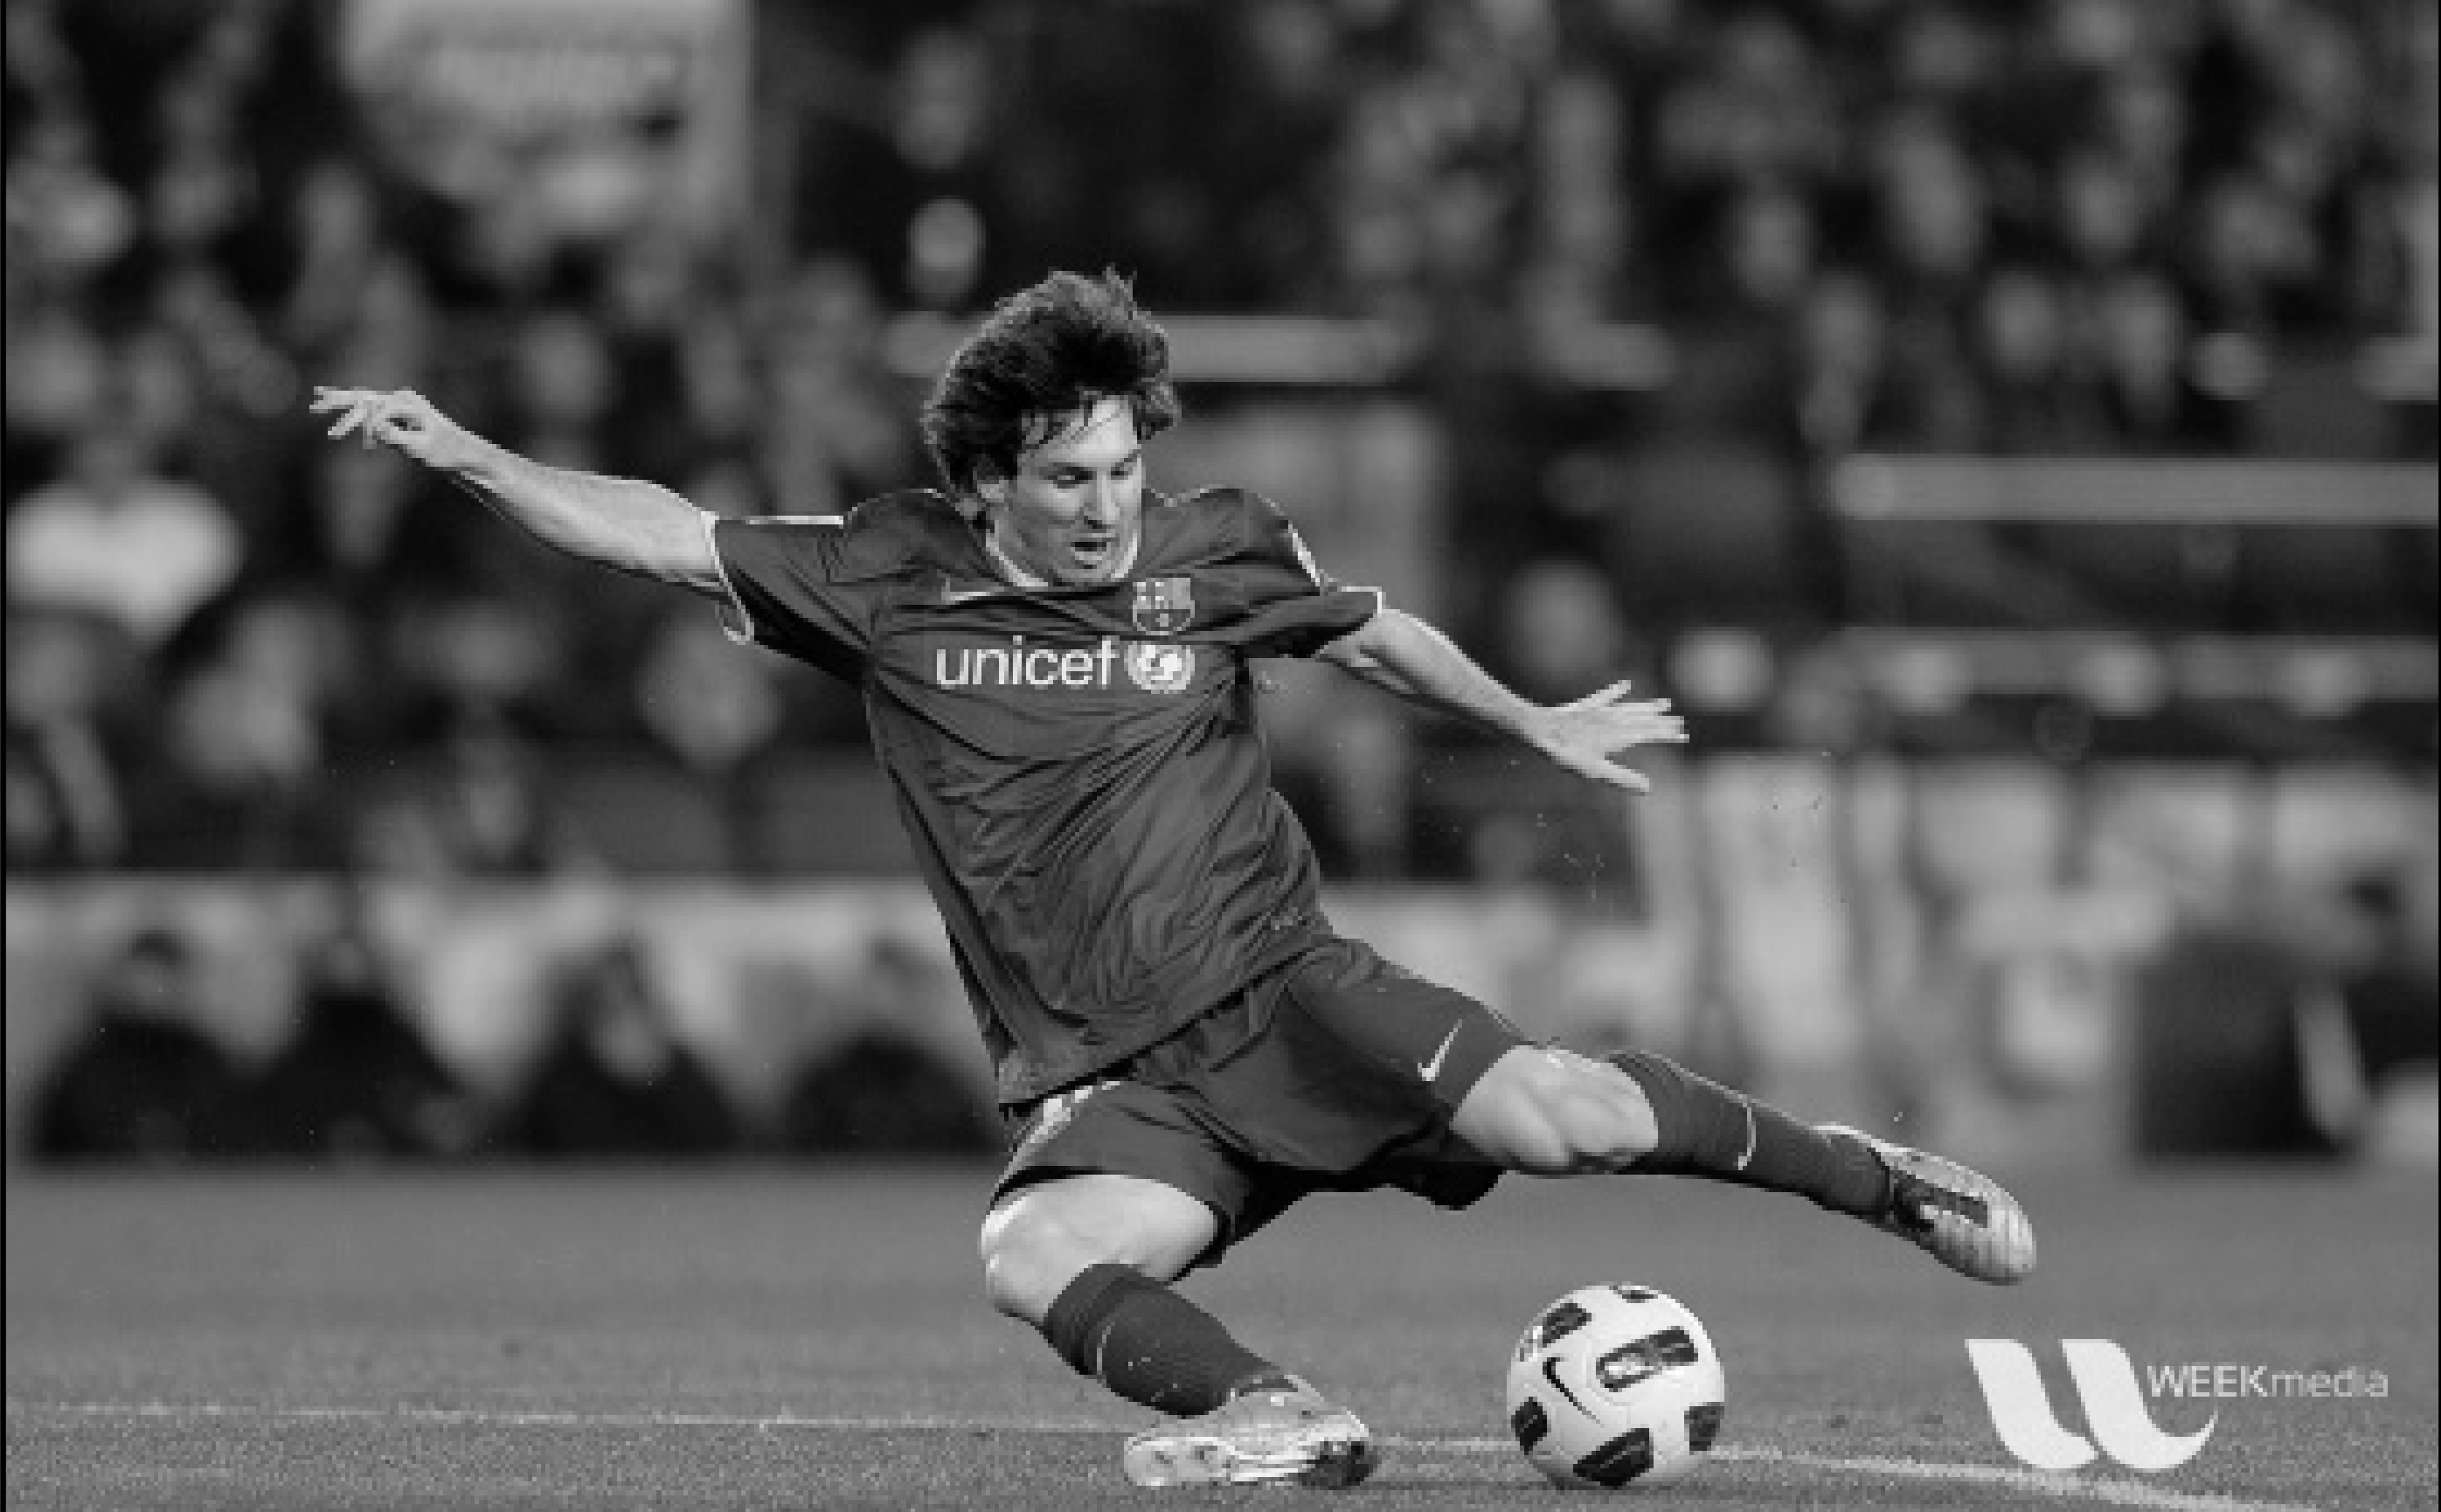



While reading and displaying an image can be done as shown above. If we want to write an image on to a local disk or some form of online storage facility we can do this as shown-

Use the function `cv2.imwrite()` to save an image.

First argument is the file name, second argument is the image you want to save.

Save the image in PNG format in the working directory.


**In Python using OpenCV we can implement this by**

```python
cv2.imwrite('your_desired_file_path',required_image)
```

# Chapter 2 : Image Basics

**Description : This chapter will give you deeper understanding on how image can be manipulated and modified according to the needs.**


While displaying an image we can see that it outputs a numpy array of certain dimension. Do you know what these values are ?
These values are called pixels. A pixel is a basic building block of a raw image there is no finer granularity that the pixel. We can think of pixel as the `color` or the `intensity` of light that appears in a given place in our image.

Consider thinking image as a grid, each square in the grid contains a single pixel. Hence, if an image has a resolution of $342\times548$ which means that this image is represented as a grid of pixels with $342$ rows and $548$ columns and the product of them $342\times548 = 187,416$ is the no. of pixels present in our image.

###  2.1 Pixel representation
***

In general there are two ways to represent the pixels : grayscale and color. 

In Grayscale pixel representation the pixel has a value ranging from 0 to 255. Where zero represents the color `black` and 255  represents for color `white` and all the values that lies between 0 and 255 are representing varying shades of gray. 



In colored pixel representation each pixel is represented in RGB color space - one value for the Red component, one for Green and one for Blue. Every component has a value ranging from 0 to 255 which indicates the strenght of that color there is.When combined these values into an RGB tuple in the form (red, green, blue). This tuple represents our color.

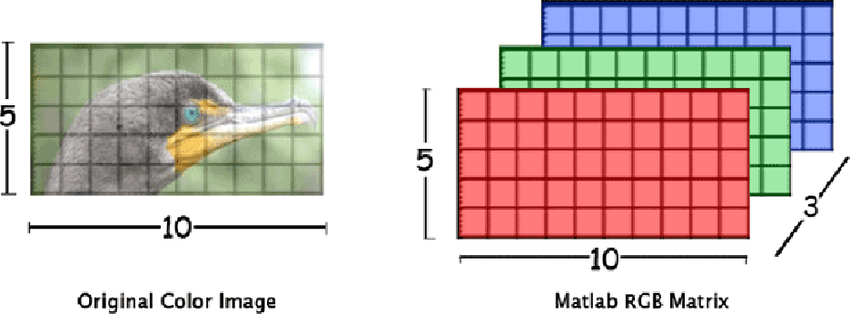





### 2.2 Accessing and Manipulating Pixels

OpenCV allows you to access every single pixel value which is nothing but a numpy array value. 

**Note that OpenCV stores RGB channels in reverse order that is it would be stored in BGR order.**

It's time to access the pixels and manipulate them.

```python
# accessing pixels at coordinate (0,0)
(b, g, r) = img[0, 0]
print('Pixel at (0, 0) - Red: {}, Green: {}, Blue: {}'.format(r, g, b)) #print out the values of that location

# manipulating the pixel at (0,0) 
img[0,0] = (0, 0 , 255) #setting the color to be pure red as red has the value 255
(b, g, r) = img[0, 0]
print('Pixel at (0, 0) - Red : {}, Green: {}, Blue: {}'.format(r, g, b)) #print out the modified values of that location

Output of orginal pixel values: Pixel at (0, 0) - Red: 44, Green: 43, Blue: 39
Output of modified pixel values : Pixel at (0, 0) - Red : 255, Green: 0, Blue: 0

```


This is just one pixel value that is manipulated if we want to modify an entire region of several pixel values we can just select that region and apply these changes similarily as follows -

```python
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) #converting BGR to RGB format
RGB_img[0:100, 0:100] = (0, 255, 0)#selecting 100 * 100 region from the image and then assigning the green color to it
plt.imshow(RGB_img)
```
Output : 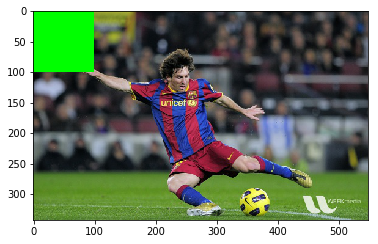



We have used `cv2.cvtColor` functionality of OpenCV that essentially converts image from one color space to another. Since the default color format in OpenCV is interpreted in RGB but it is actually BGR (as the OpenCV librarty has been built with fixing BGR format as the basic format to interpret image) .


### 2.3 Drawing objects in OpenCV
***

Until now you have learned how to select a single pixel or a set of pixels encapsuling a region on the image and manipulate it accordingly. But what if we want to draw a single line or say just a rectangle capturing a face in an image or a circle capturing the circular region or object in the image such as football. OpenCV has numerable 
functionalities to draw objects of certain shapes and sizes. Let's explore them.



#### Drawing a line using OpenCV

Drawing a line in OpenCV is an easy task. OpenCV interprets an image as a NumPy array, hence we can define our image manually. Thereby we proceed by intializing our image using np.zeros method yeilding a $400\times400$ pixel image.

To draw a line we will be using `cv2.line` functionality from OpenCV library which consists of multiple arguments such as image as numpy array on which you want your line to be drawn on, starting point of the line segment , ending point of the line segment and the color of the line.
Additionally you can change the size of the line drawn, the type of line etc.

**Pythonic implementation for drawing several shaped on a figure using OpenCV**

**Drawing a line**

```python
#Code for drawing a line using OpenCV
draw = np.zeros((400, 400, 3), dtype = 'uint8') #Intializing the image with dimension 400 * 400

red = (255, 0, 0) #specifiying the color of line to be drawn

cv2.line(draw, (0,0), (400, 400), red) # drawing a line specifiying points and color.

plt.imshow(draw)
plt.title('Drawing board')
```
Output: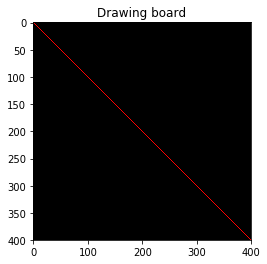


#### Drawing a rectangle using OpenCV
Drawing a rectangle in OpenCV is similar to the `cv2.line` method above. 

First argument is the image we want to draw our rectangle on. Second and third argument consists of the starting point $(x,y)$ position of the rectangle and ending postion $(x,y)$ for the rectangle. Lastly we are left with fourth argument that deals with the colour of the rectangle. 

**Drawing a Rectangle**

```python
# Code for drawing a rectangle using OpenCV
blue = (0, 0, 255) #specifying the colour of the rectangle (b,g,r) format

cv2.rectangle(draw, (50, 200), (200, 225), blue, 5) # drawing a rectangle with specified dimesion
plt.imshow(draw)
plt.title('Drawing board')
```

Output: 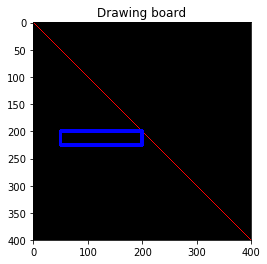

### Task : Drawing different shapes

We will be drawing a figure to get a better hands-on understanding of drawing an object on an image.

#### Instructions
- Intialize the numpy array(which is our image) of dimension 400 x 400 x 3 and with the `dtype` as `uint8` in the variable called as `draw`.

- Initialize three variable `green, blue, red` with their rgb values(Note -they should be pure green, blue and red colour) and save them with the same name as green, blue and red.

- Draw a circle of radius 150 with center of the image being the center of the circle which also contains a square which is having the diagonal length as the diameter of the circle with color being green and blue respectively.

- Lastly draw a line which superimposes one of the diagonals of the sqaure and is equal to the diameter of the circle with color being red.

Output should look like this :
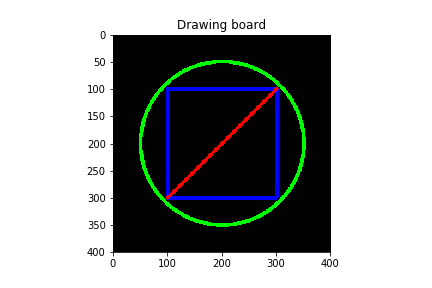





Text(0.5,1,'Drawing board')

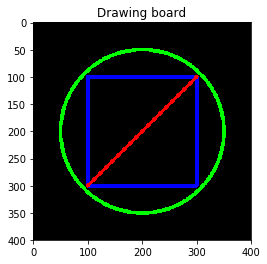

In [201]:
#Code for drawing a line using OpenCV

#code starts from here
draw = np.zeros((400, 400, 3), dtype = 'uint8') #Intializing the image with dimension 400 * 400

green = (0,255, 0) #specifiying the color of line to be drawn
blue = (0, 0, 255)
red = (255, 0 ,0)
cv2.circle(draw, (200,200), 150, green,5) # drawing a line specifiying points and color.
cv2.rectangle(draw, (300,100), (100, 300),blue, 5)
cv2.line(draw, (100, 300), (300, 100), red, 5)
plt.imshow(draw)
plt.title('Drawing board')
# code ends here

# Chapter 3 : Image Processing

**Description : Image processing is a subset technique of the field computer vision. It is related to the usage and various application of mathematical functions and transformations over images regardless of any intelligent inference being done over the image itself. This chapter will provide you working knowledge on how image can be transformed with the application of several image processing techniques.**

### 3.1 Translation

Image processing techniques helps in the providing a better manipulation of visual data by using computers. Raw visual data obtained from various sources contains deficiencies.In order to make this data more interpretable these techniques come handy. 

The purpose of image processing is divided majorly into 5 groups -

1. Visualization - Observe the objects that are not visible
2. Image sharpening and restoration - To create a better image
3. Image retrieval - Seek for the image of interest
4. Measurement of pattern - Measures various objects in image
5. Image recognition - Distinguish the objects in an image.


Let's start of with learning some of these techniques hands-on


`Translation` of an image is a technique involving shifting of an image along the $x$ and $y$ axis. With the help of this technique we can shift an image up, down, left or right, along with any combination of the above.

One can get a better grasp of this concept through some code:

```python 
#loading an image
img_process = cv2.imread('images/child.jpg', 1)
RGB_img_process = cv2.cvtColor(img_process, cv2.COLOR_BGR2RGB) #converting BGR to RGB format

M = np.float32([[1, 0, 200], [0, 1, 200]]) # translation matrix

image_trans = cv2.warpAffine(RGB_img_process, M, (RGB_img_process.shape[1], RGB_img_process.shape[0])) 

fig = plt.figure(figsize=(14, 12)) # defining the figure size

#Adding subplots to display the image adjacently
ax1 = fig.add_subplot(2, 2, 1) #adding subplot 1
ax1.imshow(RGB_img_process)
ax1.title.set_text('Orignal image') #setting title for subplot 1  

ax2 = fig.add_subplot(2, 2, 2) #adding subplot 2
ax2.imshow(image_trans)
ax2.title.set_text('Translated image') #setting title for subplot 2

```

Desired output looks like :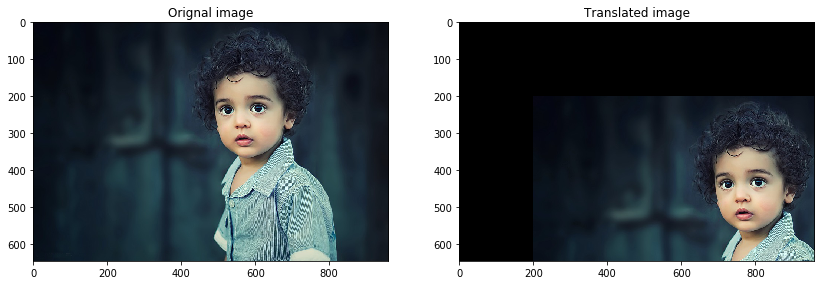

To understand the preceding code, we need to understand how warping works. Translation basically means that we are shifting the image by adding/subtracting the x and y coordinates. In order to do this, we need to create a transformation matrix, as follows:


$$M = \begin{bmatrix} 1 & 0 & t_x \\ 0 & 1 & t_y \end{bmatrix}$$

Here $t_x$ is the no. of pixels we will shift the image left or right. Negative values of $t_x$ will shift the image to the left and postive values to the right. Similarily $t_y$ will shift the image up or down. Negative values of $t_y$ will shift the image up and positive values will shift the image down.

`cv2.warpAffine` functionality of OpenCV will transform the source image using the specified matrix. It takes following arguments that we have used 

- Image as numpy array as the input
- Transformation matrix
- Size of the output image 


### 3.2 Rotation

You might have already guessed by now, this technique involves rotating an image by some angle $\theta$. Rotation is useful for scenarios to provide variation to existing data thereby making machine learning models more robust to the data variation. Also this rotation can be applied in the pre-processing stage while building a computer vision application to make sure that the data is consistent in terms of $\theta$.

Let's explore how we can rotate an image with the help of OpenCV.

```python
(height, width) = RGB_img_process.shape[:2] #Getting dimensions of an image
rotation_center = (width // 2, height // 2) #rotation around the center of image using integer division (//)

M_rotate = cv2.getRotationMatrix2D(rotation_center, 50, 1.0) #rotation matrix with center, angle and scale provided

img_rotated = cv2.warpAffine(RGB_img_process, M_rotate, (width, height)) 

fig = plt.figure(figsize=(14, 12)) # defining the figure size
ax1 = fig.add_subplot(2, 2, 1) #adding subplot 1
ax1.imshow(RGB_img_process)
ax1.title.set_text('Orignal image')

ax2 = fig.add_subplot(2, 2, 2) #adding subplot 2
ax2.imshow(img_rotated)
ax2.title.set_text('Rotated image by 50 degrees') #setting title for subplot 2

```

Output: 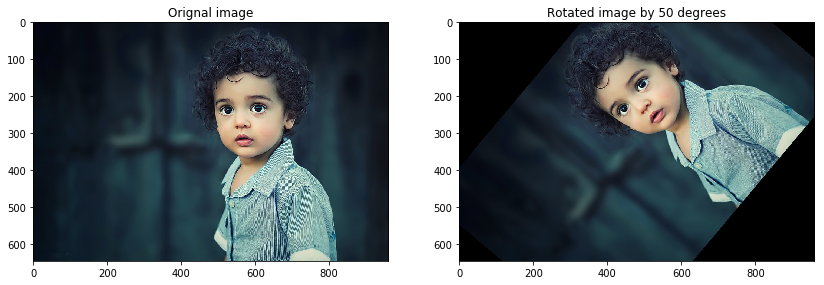

Let's walkthrough the code above. We will start off with getting the dimensions such as height and the width of the image and then using them to define the center point around which we want to rotate the image. However, OpenCV allows you to specify any arbitary point around which you want to rotate.

Next up we define our center for image to be rotated as the center of our image. We proceed by defining a matrix to rotate the image just as we defined while translating an image but rather than manually constructing it we will make use of `cv2.getRotationMatrix2D` method. 
**This method takes in three arguments: the point at which we want to rotate the image around, the number of degrees we are going to rotate the image by, scale of the image.** 

Lastly we apply our rotation matrix from the `cv2.getRotationMatrix2D` function, we can apply the rotation to our image by using `cv2.warpAffine` method followed by plotting the original and transformed image.

### 3.3 Resizing

`Resizing` or scaling as we call it is a technique to increase or reduce the size of an image. Web browsers, image editors, image and file viewers are among the various applications of image scaling or resizing is being applied.

Let's now look at how can we perform it on the image.

```python
r = 600/ RGB_img_process.shape[1] #aspect ratio

dim = (600, int(RGB_img_process.shape[0] * r)) #resulting dimension of scaled image 

img_resized = cv2.resize(RGB_img_process, dim, interpolation = cv2.INTER_AREA)# using resize functionality of openCV

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7), dpi=80, sharex= True , sharey= True)
ax[1].imshow(img_resized)
ax[1].title.set_text('Resized(Scaled) Image')
ax[0].imshow(RGB_img_process)
ax[0].title.set_text('Orignal Image')
```

Output: 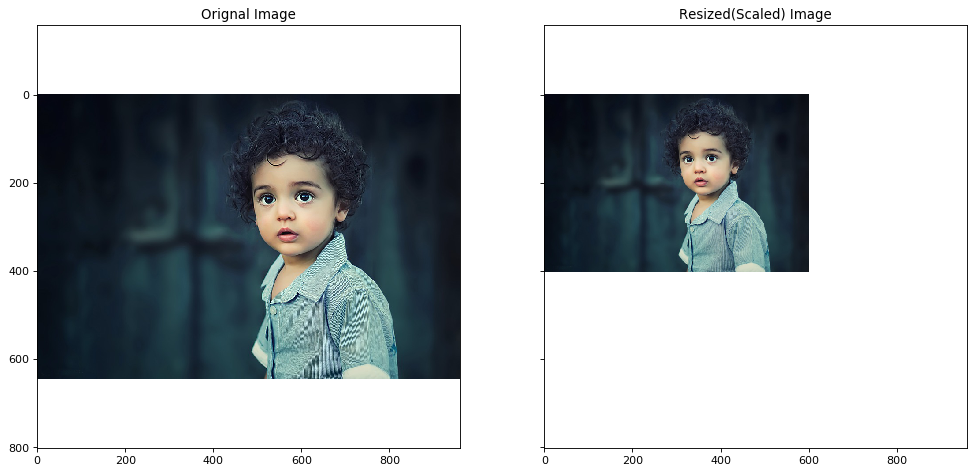


While resizing the image we need to keep in mind the aspect ratio of an image.The above code starts off with defining the aspect ratio of the image which is the proportional relationship of width and height of an image which is denoted by `r`.

Here, we want our image to be of width 600 pixels hence the ratio computed will be simply $r =\frac{\text{new_width} (600)}{\text{orignal_width(960)}}$. So the dimension of the scaled image would be $(\text{new_width}, r*\text{orignal_height})$ which gets feeded into the openCV functionaltiy of resizing an image as second parameter along with orignal image as first parameter. Third parameter of function `cv2.resize` is the interpolation method which actually is an alogrithm that handles how the actual image will be resized to a particular scale. 

You might be wondering as to why we took the pain to compute the aspect ratio and scale the width and height of an image accordingly is because if aspect ratio is not preserved then the resulting scaled image would not as you desire it to be. It can appear to be distorted.





### 3.4 Flipping 

`Flipping` an image is a technique that deals with a mirrored-reversal of an orginal image across any one of the axis be it a horizonal axis or vertical axis. 

Let's get a better intution by trying it practically on the image with the help of OpenCV.

```python
img_flipped = cv2.flip(RGB_img_process, 1) #performing image flip along y-axis horizontally
img_flipped_1 = cv2.flip(RGB_img_process, 0) #perfroming image flip along x-axis verically
img_flipped_2 = cv2.flip(RGB_img_process, -1) #perfroming image flip alond both axis

#Defining a suplot of 2 rows and 2 columns
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 7), dpi=80)
ax[0,0].imshow(RGB_img_process)
ax[0,0].title.set_text('Orignal Image')
ax[0,1].imshow(img_flipped)
ax[0,1].title.set_text('Flipped Image along horizontally along y-axis')
ax[1,0].imshow(img_flipped_1)
ax[1,0].title.set_text('Flipped Image along vertically along x-axis')
ax[1,1].imshow(img_flipped_2)
ax[1,1].title.set_text('Flipped Image along horizontal and vertical axis')

```
Output : 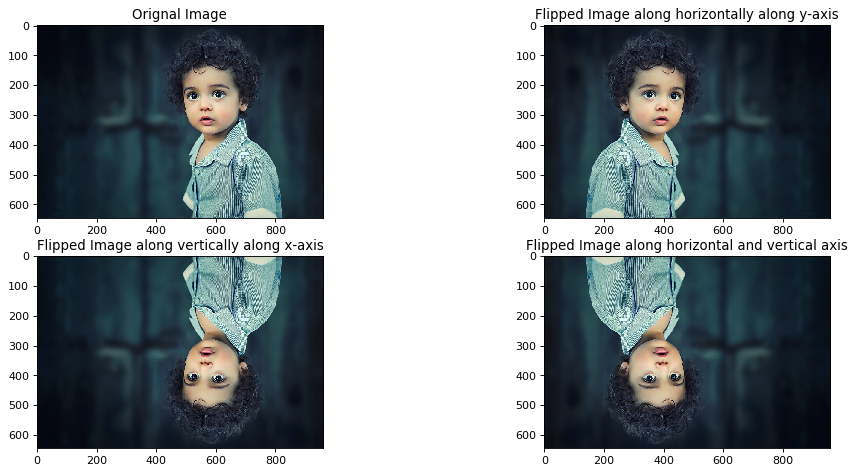

In the above code we are using a specific functionality provided by OpenCV to flip the image that is `cv2.flip`. This method requires two arguments : first the image we want to flip and secondly flip code that is used to flip the image.

Using flip code value 1 will flip the image horizontally, around the y-axis.
Specifying a flip code of 0 indicates that we want to flip the
image vertically, around the x-axis. Finally, using
a negative flip code flips the image around both
axes.

### 3.5 Cropping

Suppose you have an image consisting of lot of objects in it. You are interested in one particular object and you want to be seperated out and kept aside to further investigate upon that. This sort of scenario is tackled by cropping the image to the desired area while ignoring the unwanted outer areas from a photographic or illustrated image.

Let's see cropping in action
```python
img_cropped = RGB_img_process[0:350, 450:700] #cropping the image with specified height and width respectively
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7)) # subplots intiation
ax[0].imshow(RGB_img_process) 
ax[0].title.set_text('Orignal Image')
ax[1].imshow(img_cropped)
ax[1].title.set_text('Cropped Image')
```
Output : 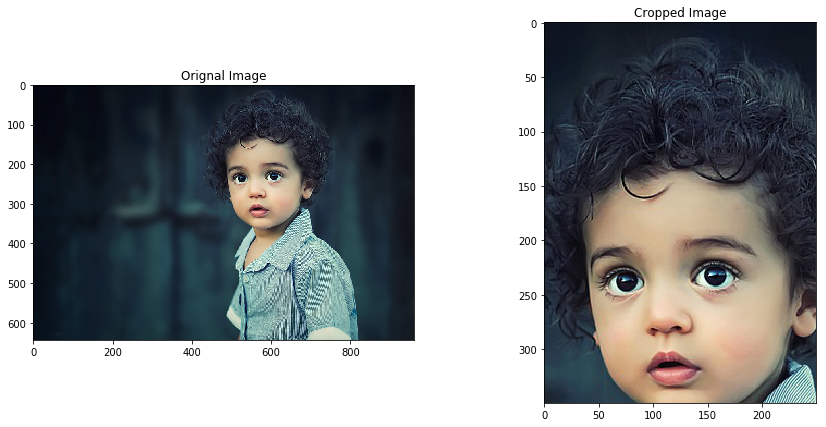

In the above code you can see that cropping takes place in a single line of code. We basically slice the numpy array (which is our image in this case) to the desired area we want. This region encompasses a rectangular area of specifiying range of height followed by range of width.

In order to perform our cropping, NumPy expects four
indexes:
1. Start y: The starting y coordinate. In this case, we
start at y = 0.
2. End y: The ending y coordinate. We will end our crop
at y = 350.
3. Start x: The starting x coordinate of the slice. We start
the crop at x = 450.
4. End x: The ending x-axis coordinate of the slice. Our
slice ends at x = 700.

Alas we have cropped our image now keep staring at this cute face.

### 3.6 Image Arithmetic

Image Arithmetic comprise of several techniques to perform basic airthmetic operations such as additon, subtraction, multiplication and divison on images. This technique has many use cases in image processing both as a prelimnary step in more complex operation and by itself. For example, image subtraction can be used to detect the differences between two or more images of the same scence or object.

Following code snippets will be guiding you through different image arithmetic operations.We will start off with introducing what happens if we add or subtract two or more images using OpenCV.

#### Image Addition and Subtraction

Before jumping straight to the additon or subtraction of images directly let's discuss what happens if we are examining a pixel of value 251 and we try to add 12 to it.If we proceed by the approach of basic arithmetic rules we would end up adding having a total value of 263 but since RGB images are represented as 8-bit unsigned integers 263 is not a valid value same goes in the case of subtraction a value resulting from the basic subtraction attaining a negative pixel values is not valid when it comes to RGB images.


There are two ways to handle the situation posed above 

1. We can perform a check to ensure that no pixel falls outside the range of [0,255], thus clipping all pixels to have a minimum and maximum value of 0 and 255 respectively.

2. Or we can apply a modulus operation and wrap around the values.

Now you can go on implementing any of these two ways mentioned above depending upon how you want the desired results to be. But keep in mind that OpenCV will by default perform clipping and ensure that pixel values do not fall outside the range [0, 255] and using numpy will perform modulo airthmetic and 'wrap around'.


Let's code it up.

```python
M_add = np.ones(RGB_img_process.shape, dtype = 'uint8')*100 #numpy array of size of image containing each pixel value as 100
addition = cv2.add(RGB_img_process, M_add) #using opencv functionality to add two images

M_sub = np.ones(RGB_img_process.shape, dtype = 'uint8')*50 #numpy array of size of image containing each pixel value as 50
subtraction = cv2.subtract(RGB_img_process, M_sub)  #using opencv functionality to subtract two images

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 7), dpi=80)
ax[0].imshow(addition)
ax[0].title.set_text('Image added')
ax[1].imshow(subtraction)
ax[1].title.set_text('Image subtracted')
```

Output : 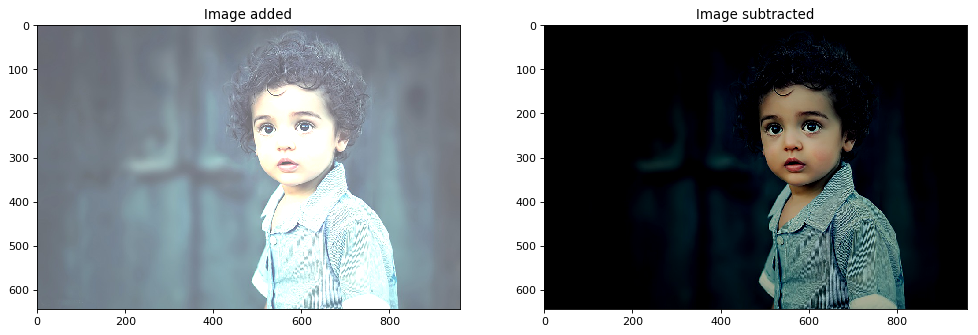

As you can see above when we add the image by adding 100 value to each pixel thus increasing each pixel intensity and pushing them towards brighter colors making it look like the image has  been washed out. In case of subtracting one image from other our results have an image looking much darker than the orignal image which may be due to pixel values being decreased with an amount of 50 leading them to a darker region in RGB color space.

#### Task: Performing image subtraction, addition and Blending on an image

This task will provide a bit hands on experience on how to apply different image arithmetic operations. You are given two image which are given below -

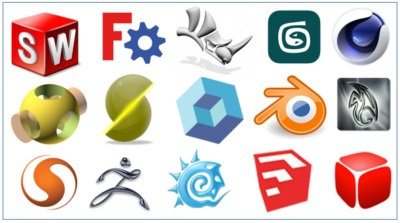
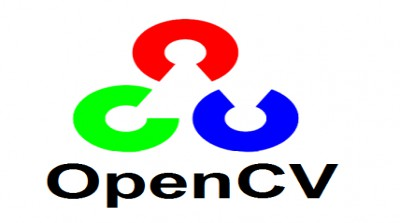


#### Instructions
- The images above shown has been loaded for you in the variable `logo` and `opencv` respectively.
- Convert the images from BGR format to RGB format and name the variables as `logo_rgb` and `opencv_rgb`.
- Now perform the image subtraction operation by using `cv2.subtract` on the above images and name the variable as `img_sub`.
- Secondly perform the image addition operation by using simple numpy additon on the above images and name the variable as `img_add`
- Perform the image addition operation by using `cv2.add` on the above images and store in the variable named as `img_add_cv`.
- Lastly the image blending operation by using `cv2.addWeighted` on the above images and name the variable as `img_blend`
- Plot all the graphs side by side on a subplot 


Output : -

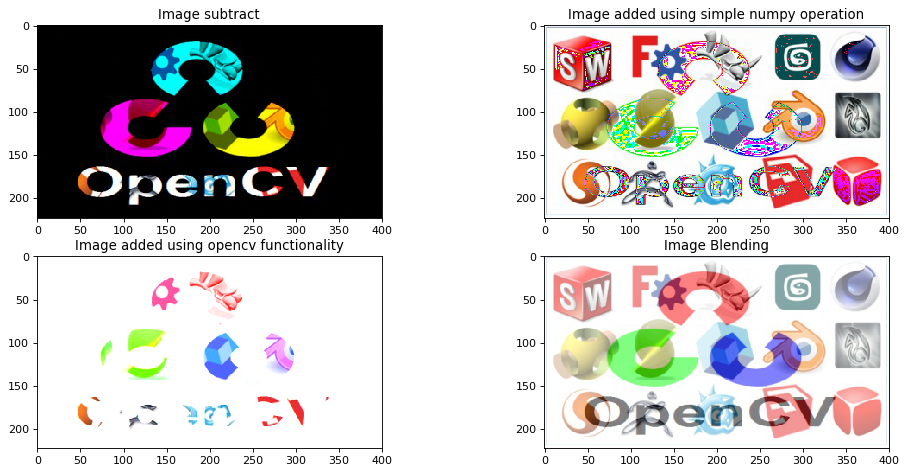



Why do you think there is a difference between the two types of image addition that is simple numpy addition and image addition via opencv produces different results?

In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

logo = cv2.imread('./images/logos.jpg', -1)
opencv = cv2.imread('./images/OpenCV_Logo.jpg', -1)

# code starts from here
logo_rgb = cv2.cvtColor(logo, cv2.COLOR_BGR2RGB) # changing bgr to rgb
opencv_rgb = cv2.cvtColor(opencv, cv2.COLOR_BGR2RGB)# changing bgr to rgb

img_sub = cv2.subtract(logo_rgb, opencv_rgb) #performing subtract operation
img_add = logo_rgb + opencv_rgb #perfoming simple numpy addition
img_add_cv = cv2.add(logo_rgb, opencv_rgb) #perfoming image addition using opencv
img_blend = cv2.addWeighted(logo_rgb, 0.5, opencv_rgb, 0.5, 0) #image blending using weighted addition

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 7), dpi=80)
ax[0,0].imshow(img_sub)
ax[0,0].title.set_text('Image subtract')
ax[0,1].imshow(img_add)
ax[0,1].title.set_text('Image added using simple numpy operation')
ax[1,0].imshow(img_add_cv)
ax[1,0].title.set_text('Image added using opencv functionality')
ax[1,1].imshow(img_blend)
ax[1,1].title.set_text('Image Blending')


### 3.7 Bitwise Operations
This includes bitwise `AND`, `OR`, `NOT` and `XOR` operations. They will be highly useful while extracting any part of the image, defining and working with non-rectangular ROI(Region of Interest) etc. While these four operations are very basic and low level but these operations are paramount to image procesing especially during masking an image.

These operations operate in a binary manner and are represented as grayscale images.A given pixel is turned
“off” if it has a value of zero, and it is turned “on” if the
pixel has a value greater than zero.


**Pythonic implementation of Bitwise operators**
```python
# Let's try to intialize figure by drawing a circle and rectangle 

white = (255, 255, 255) # initializing color of the figure
img_rectangle = np.zeros((400, 400, 3), dtype = "uint8") #intializing image of 400 * 400
cv2.rectangle(img_rectangle, (50, 50), (350, 350), white, -1) #Drawing a rectangle on the image with opencv functionality 

img_circle = np.zeros((400, 400, 3), dtype = 'uint8') #intializing image of 400 * 400
cv2.circle(img_circle, (200, 200), 170, white, -1) #Drawing a circle on the image with opencv functionality 

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 7), dpi=80)
ax[0].imshow(img_rectangle)
ax[0].title.set_text('Rectangle')
ax[1].imshow(img_circle)
ax[1].title.set_text('Circle')

# Performing bitwise operations on the image
bitwiseAnd = cv2.bitwise_and(img_rectangle, img_circle) #performing bitwise AND operation on an image of rectangle and circle

bitwiseOr = cv2.bitwise_or(img_rectangle, img_circle) #performing bitwise OR operation on an image of rectangle and circle

bitwiseXor = cv2.bitwise_xor(img_rectangle, img_circle) #performing bitwise XOR operation on an image of rectangle and circle

bitwiseNot = cv2.bitwise_not(img_circle) #performing bitwise NOT operation on an image of rectangle and circle

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(9, 9), dpi=80)
ax[0,0].imshow(bitwiseAnd)
ax[0,0].title.set_text('AND')
ax[0,1].imshow(bitwiseOr)
ax[0,1].title.set_text('OR')
ax[1,0].imshow(bitwiseXor)
ax[1,0].title.set_text('XOR')
ax[1,1].imshow(bitwiseNot)
ax[1,1].title.set_text('NOT')
```
Output :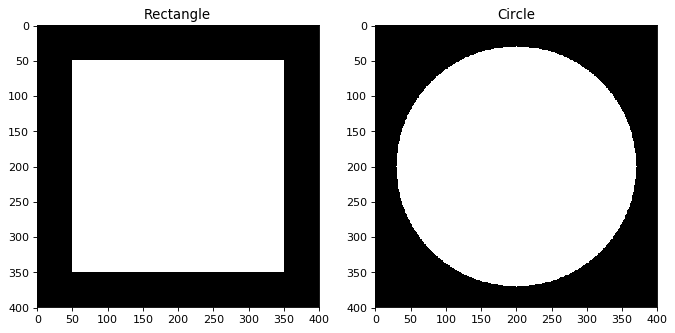
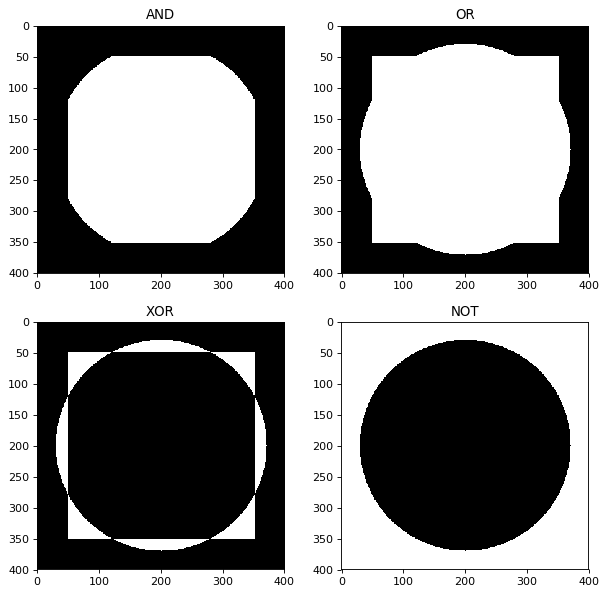

Let's go through each of the bitwise operations:

1. `AND`: A bitwise AND is true if and only if both pixels are greater than zero.
2. `OR`: A bitwise OR is true if either of the two pixels are greater than zero.
3. `XOR`: A bitwise XOR is true if and only if either of the two pixels are greater than zero, but not both.
4. `NOT`: A bitwise NOT inverts the “on” and “off” pixels in an image.

To make clear what how the above code is working let's take a deep dive into how each of the bitwise operations work.

When we apply bitwise AND to our rectangle and circle images using the `cv2.bitwise_and` function what is does is it gets evaluated to true if and only if both pixel values are greater than zero which results in edges of the squares being lost because rectangle dosen't cover as large area as the circle.

We then proceed to apply bitwise OR using `cv2.bitwise_or` which results true when either of the two pixel have values greater than zero which means that both circle and rectangle area would be covered as both of them have the value greater than zero.

Next up we proceed to apply bitwise XOR using `cv2.bitwise_xor` which results true if either of them pixels are greater than zero and results false if both of them are zero or greater than zero. This is justified by the resulting graph having regions colored as white where any one of the pixel value is greater than zero.

Lastly, `cv2.bitwise_not` flips pixel values which means pixels having values greater than zero are set to zero, and all pixels that are set to zero are inverted to 255, hence our white circle is flipped black circle.

### 3.8 Masking

This is an extremely powerful and useful technique in computer vision and image processing. This technique allows us to focus only on the portions of the image that interests us. One of the popular use case of masking is to extract the faces from  several set of pictures using the face mask.


Consider the image below

```python
img1  = cv2.imread('images/sunset.jpeg') #loading an image
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB) # converting an image from default BGR to RGB format
plt.figure(figsize=(8,8))
plt.imshow(img1)
plt.title('Orignal Image')
```
Orignal Image :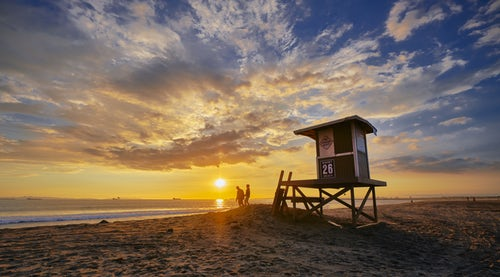

Now suppose our area of interest is the beach house that is in the image below. To obtain that we can create a rectangular mask as below.

```python
mask = np.zeros(img1.shape, dtype = 'uint8') #creating an image of same dimension as the above image using numpy
(X,Y) = (img1.shape[1]//2, img1.shape[0]//2) #defining the center of the rectangular roi
cv2.rectangle(mask, (X - 75, Y - 75), (X + 115, Y + 115), (255, 255, 255), -1) # mask of rectangular region
plt.imshow(mask)
```
Output : 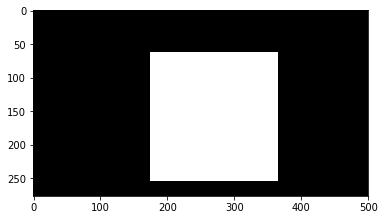



```python
masked = cv2.bitwise_and(img1, mask) #perfoming masking with a bitwise AND operation
plt.imshow(masked)
plt.title('Masked image')
```
Output : 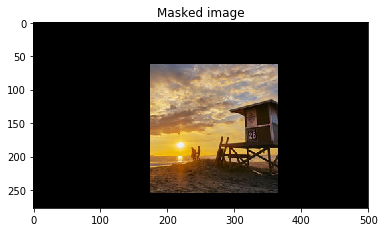

### 3.9 Histograms

You may have studied histograms particularly in different prespective which is providing a statistical summary of data falling into different buckets as their frequency counts. 

Histogram in the field of computer vision represents the distribution of pixel intensities (whether color or gray scale ) in an image. It is a plot with pixel values (usually ranging from 0 to 255, not always) in X-axis and corresponding number of pixels in the image on Y-axis. 

It is just another way of understanding the image. By looking at the histogram of an image, you get intuition about contrast, brightness, intensity distribution etc of that image. Almost all image processing tools today, provides features on histogram.

#### Histogram Calculation in OpenCV
So now we use cv2.calcHist() function to find the histogram. Let’s familiarize with the function and its parameters :

    cv2.calcHist(images, channels, mask, histSize, ranges[, hist[, accumulate]])

`images` : it is the source image of type uint8 or float32. it should be given in square brackets, ie, “[img]”.

`channels` : it is also given in square brackets. It the index of channel for which we calculate histogram. For example, if input is grayscale image, its value is [0]. For color image, you can pass [0],[1] or [2] to calculate histogram of blue,green or red channel respectively.

`mask` : mask image. To find histogram of full image, it is given as “None”. But if you want to find histogram of particular region of image, you have to create a mask image for that and give it as mask.

`histSize` : this represents bin count. Need to be given in square brackets. For full scale, we pass [256].

`ranges` : this is range of intensity values. Normally, it is [0,256], ie all intensity values.



#### Grayscale Histograms
So let’s start with a sample image. Simply load an image in grayscale mode and find its full histogram.



**Pythonic implementation of Different histograms**
**Grayscale Histogram**

```python
sunflower_grayscale_image = cv2.imread('images/sunflower.jpg', 0) #loaded the image in grayscale mode

hist = cv2.calcHist([sunflower_grayscale_image],[0],None,[256],[0,256]) #calculating the histo

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(25, 7))
ax[0].imshow(sunflower_grayscale_image, 'gray') #showing the image in grayscale mode
ax[0].title.set_text('Gray Scale Image')
ax[1].plot(hist) #plotting the histogram
ax[1].title.set_text('Histogram of Gray Scale Image') 
```
Output :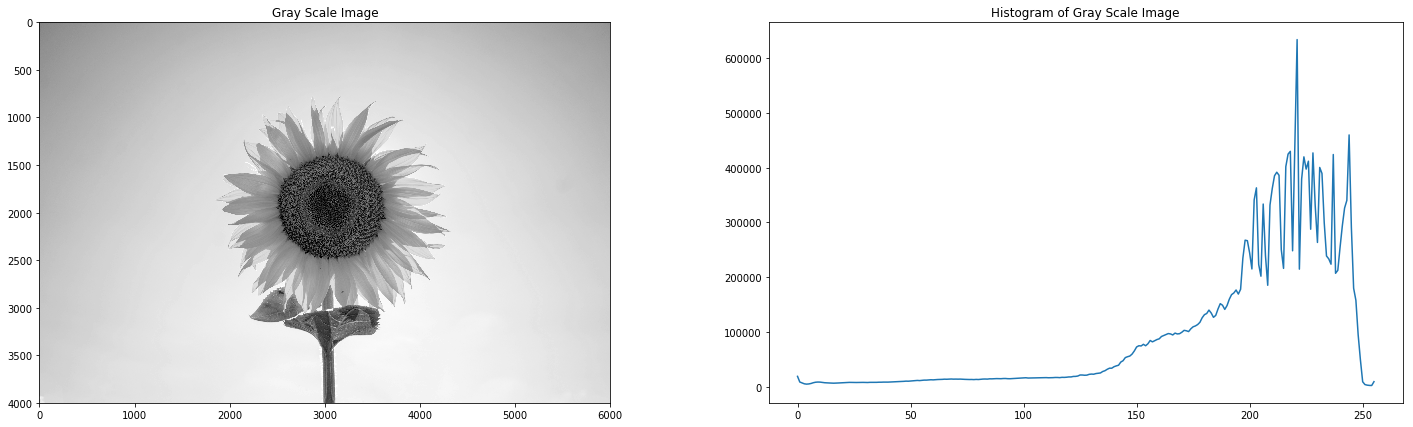



The above code loads an image in grayscale mode by specifying the second argument as 0 during `imread` operation. We then proceed by calculating the histogram by specifying the gray scale(`[sunflower_image]`) image as the first argument followed by `0` which signifies their is only one channel for grayscale images. Our mask attribute is set to `None` as we don't have a mask.

We then use 256 bins in our histogram, and the possible values range from 0 to 256.

Well this explains the code but how do we **interpret this histogram**. As we know that bins (0-255) are plotted on the x-axis and y-axis counts the number of pixels in each bin. The majority of pixels fall in the rangle 150 to 240 which means that there is higher concerntration of white colour or bright variations of gray which is indeed true.

#### Color Histograms

Now that you have explored how to plot and interpret grayscale histograms let's move on to computing color histograms for each channel of the image. 

**Color Histograms**
```python
sunflower_color_image = cv2.imread('./images/sunflower.jpg',  -1) #Reading an image in BGR color mode
channels = cv2.split(sunflower_color_image) # Splitting each B, G and R channel values 
bgr_color = ('b', 'g', 'r') # specifiying the color channels order
legends = ['blue', 'green', 'red']

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(21,7))
ax[0].imshow(cv2.cvtColor(sunflower_color_image, cv2.COLOR_BGR2RGB)) #displaying image in RGB color mode
ax[0].title.set_text('Orignal Image')

# loop for iterating through each channel and plot their histogram
for (chan, color, label) in zip(channels, bgr_color, legends): 
    color_hist = cv2.calcHist([chan], [0], None, [256], [0,256])
    ax[1].plot(color_hist, color = color, label = label)
    ax[1].set_xlim([0, 256])
    ax[1].legend()
```
Output : 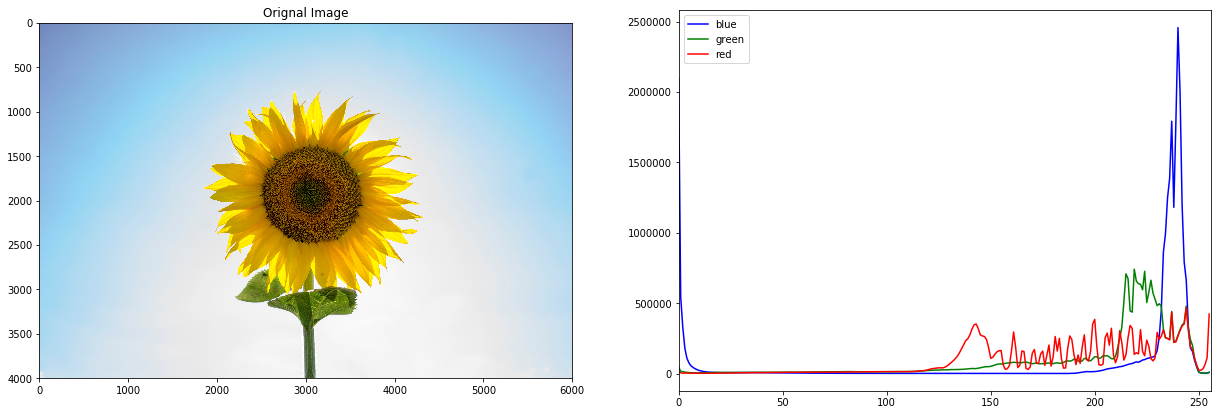

A slight modification to code instead as here we are dealing with three channels that Blue, Green and Red. With help of recursive function we are enable to traverse through the values of each channel and plot a color histogram of it.
**You can now gather more precise knowledge about pixels color distribution as we can see the maximum density of pixel are falling in blue intensity which is true as the backdrop of image above is mainly concerntrated with blue color. We also observe that red and green pixel value of darker variation are having somewhat contribution too which is intutive as in this case high value of red and green pixel values indicates the presence of yellow color which is the sunflower in our case.**

### 3.10 Image Smoothing and Blurring

Couple of time while taking a picture with a camera we often get to see camera getting out of focus to which it causes image to get blurred. Sharper regions in the image lose their detail.

Behind the scenes what happens is each pixel in the image is mixed with its surrounding pixel intensities and this mixture of pixels in a neighbourhood becomes our blurred pixel.

Though this may appear an unwanted effect in our photograph but image processing techniques such as thresholding and edge detection has noted an improved performance when the image is smoothed or blurred beforehand.


There are several techniques in order to obtain the blurry effect we will be discussing few of those :

#### Averaging
This technique involves specifiying a sliding window(convolution kernel) on top of our image of dimension $k\times k$ where we generally choose k to be an odd number. A $3\times3$ normalized box filter would look like this:
$$K = \frac { 1 } { 9 } \left[ \begin{array} { l l l } { 1 } & { 1 } & { 1 } \\ { 1 } & { 1 } & { 1 } \\ { 1 } & { 1 } & { 1 } \end{array} \right] $$

This window slides from left to right and from top to bottom and the pixel at the center of this matrix (for obtaining a true center we use k as odd) is set then to the average of all the other pixels surrounding it.



Let's see how can we do this in python

```python
img_street = cv2.imread('./images/street.jpg', -1) #Reading an image in BGR color mode
img_street_rgb = cv2.cvtColor(img_street, cv2.COLOR_BGR2RGB) #converting BGR image into RGB color mode

# Stacking three image with different sizes of convolution kernel(matrix)
blurred_img = np.hstack([cv2.blur(img_street_rgb, (3,3)), cv2.blur(img_street_rgb, (5,5)), cv2.blur(img_street_rgb, (7,7))])

# Displaying the orignal vs blurred image using subplots
fig, (ax_1, ax_2) = plt.subplots(nrows=2, ncols=1, figsize=(15,9))
ax_1.imshow(img_street_rgb)
ax_1.title.set_text('Orignal Image')

ax_2.imshow(blurred_img)
ax_2.title.set_text('Blurred Image with three different variations of intensity of Averaging')
```
Output : 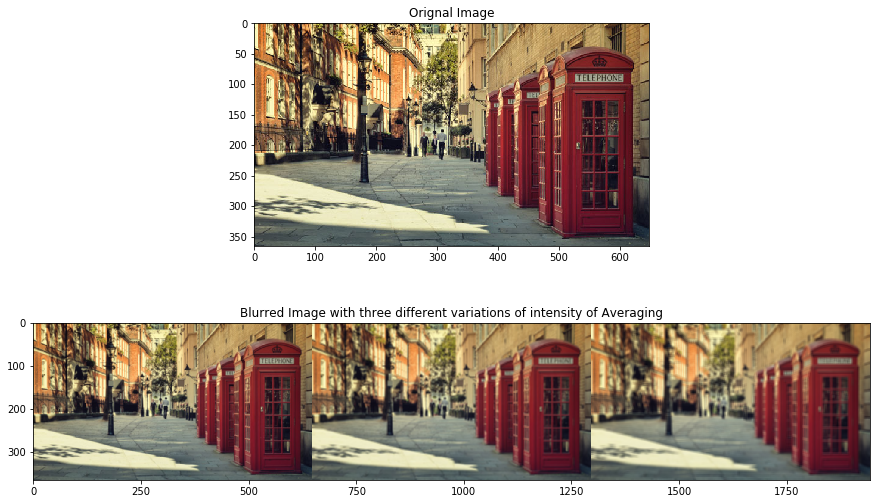


We can see in the above graphs clearly the picture having different intensity of blur being incorporated thereby making it less noisy and smooth.

#### Gaussian Blur

This technique is similar to average blurring, but instead of using a simple mean we will be using a weighted mean where we will be giving more preference (weights) to the neighbouring pixel values that are closer to the pixel which is situated at center of the matrix.


This technique provide a close approximation towards the real world scenario by providing a more natural blurred image (a little less blurred).

Let's see gaussian blur in action.

```python
# Stacking three image with different variation of gaussian blur using different sizes of weighted convolutional kernel
gaussian_blur_img = np.hstack([cv2.GaussianBlur(img_street_rgb, (3, 3), 0), cv2.GaussianBlur(img_street_rgb, (5,5), 0), cv2.GaussianBlur(img_street_rgb, (7,7), 0)])

fig, (ax_1, ax_2) = plt.subplots(nrows=2, ncols=1, figsize = (15,9))
ax_1.imshow(img_street_rgb)
ax_1.title.set_text('Orignal Image')
ax_2.imshow(gaussian_blur_img)
ax_2.title.set_text('Gaussian Blur with variation in blur intensity')
```

Output :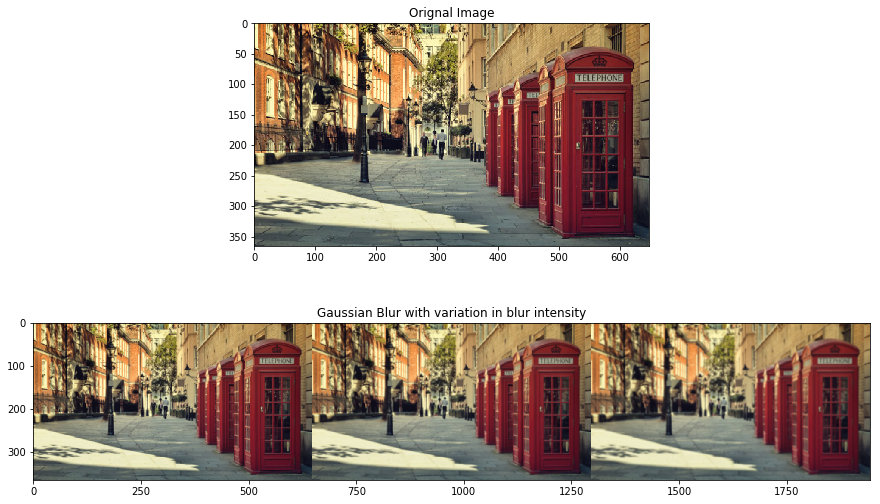

The above code makes use of the functionality `cv2.GaussianBlur` which takes in the first argument as the desired image you want to get blurred followed by the convolutional kernel size and lastly we provide $\sigma$ which is the standard deviation in x-axis direction. By setting this value to 0, we are instructing OpenCV to automatically compute them based on our kernel size.

Comparing the above two techniques of blurring(smoothing) an image we see a more natural blur depicting closer to real world scenarios while using gaussian blur. 

Although apart from these techniques there are several other methods such as Median Based Blurring, Bilateral blurring which we will not cover in this notebook. If you want to know more about these techniques please have a look at the following link mentioned - [resource](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html)



### 3.11 Thresholding

There is another way to concerntrate on the desired objects of interest in an image. This technique is called as thresholding . Thresholding is the binarization of an image.

For example, let's select a pixel of value p now what we mean by binarizing the image is we will be setting all pixel intensities to zero if these values fall below p, and we will set all the pixel intensities to 255 if the fall above the value p.


This technique also contains several methods where in we will discuss only few of them such as


#### Simple Thresholding
This type of thresholding requires human intervention that we must specify a threshold value T which will convert all the pixel values above T as 255 and below as 0.


**Using opencv we can implement different types of thresholding like below**

```python
bowling = cv2.imread('./images/bowling.jpg')
bowling_gray = cv2.cvtColor(bowling, cv2.COLOR_BGR2GRAY) #BGR to RGB conversion
blur_bg = cv2.GaussianBlur(bowling_gray, (5,5), 0) #using gaussian blur to make the image bit smoother
(T, th) =cv2.threshold(blur_bg, 155, 255, cv2.THRESH_BINARY) #setting up the threshold value and performing binary thresholding
(T, th_Inverse) = cv2.threshold(blur_bg, 155, 255, cv2.THRESH_BINARY_INV) #setting up the threshold value and performing inverse binary thresholding
binary_bg = cv2.bitwise_and(bowling_gray, bowling_gray, mask=th_Inverse) # application of mask of inverse binary threshold on grayscale image


fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 9))
ax[0, 0].imshow(bowling_gray, 'gray') #showing the image in grayscale mode
ax[0, 0].title.set_text('Gray Scale Image')
ax[0, 1].imshow(th, 'gray') # threshold application done manually 
ax[0, 1].title.set_text('Threshold binary') 
ax[1, 0].imshow(th_Inverse, 'gray') # Inverse of the threshold image above 
ax[1, 0].title.set_text('Threshold binary inverse') 
ax[1, 1].imshow(binary_bg, 'gray') # application of threshold inverse mask on grayscale image.
ax[1, 1].title.set_text('Application of mask') 
```
Output: 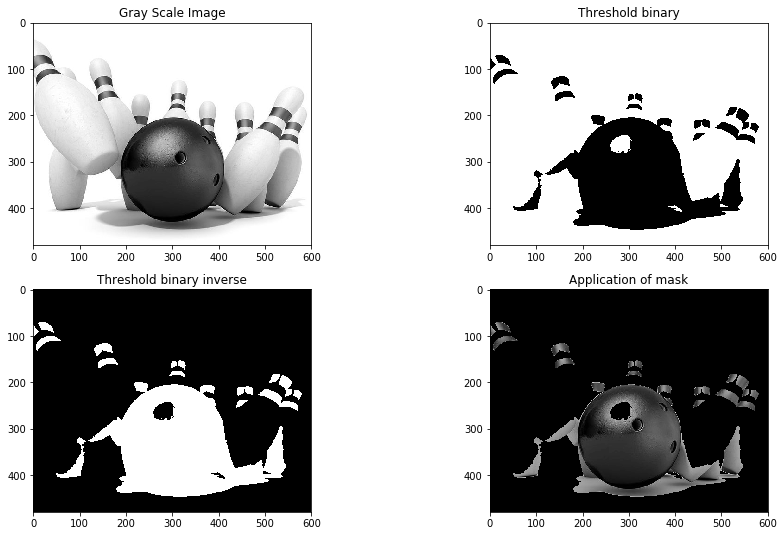

The above images can be inferred as doing various operations and application of thresholding. Firstly we convert the RGB color space image to a grayscale format followed by application of gaussian blurring. It has been found that blurring provides removal of high frequency edges which are generally not taken into consideration. 

Next up we compute the thresholded image by using OpenCV funationality `cv2.threshold` function. It consists of four arguments :-

- The image
- Threshold value (manually adjusted which is T = 155)
- max value applied during thresholding ( any pixel intensity p greater than T is set to this value)
- thresholding method


We have also computed the inverse of threshold that we performed above by specifiying the threshold method as `cv2.THRESH_BINARY_INV` which inverts the value of 0 as 255 and 255 as zero. Lastly, we are able to extract the bowling ball to somewhat level by application of binary and mask over the image which results in extraction of area only having values greater than 0.

#### Adaptive Thresholding

One of the disadvantages of using simple thresholding is the manual human intervention step of setting up the threshold value which leads to the extra time consumption as we humans have to go through several iteration in order to come up with tuned values of threshold which will be appropriate for that particular image. Also, there is one more drawback to the above approach simple threshold dosen't perform well with images containing lot of range in pixel intensities.


To overcome this problem we have something called as adaptive thresholding. This type of thresholding considers small neighbours of pixel values and finds an optimal threshold value of T for each neighbour.


**Adaptive Thresholding**

```python
th_adaptive = cv2.adaptiveThreshold(blur_sg, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 4) #neighbourhood threshold calculation using mean threshold

fig, ax = plt.subplots(nrows = 1, ncols=2, figsize=(15, 9))
ax[0].imshow(th_adaptive, 'gray')
ax[0].title.set_text('Mean Threshold')

th_adaptive_gauss = cv2.adaptiveThreshold(blur_sg, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 25, 5)#neighbourhood threshold calculation using gaussian mean threshold
ax[1].imshow(th_adaptive_gauss, 'gray')
ax[1].title.set_text('Gaussian Threshold')
```
Output: 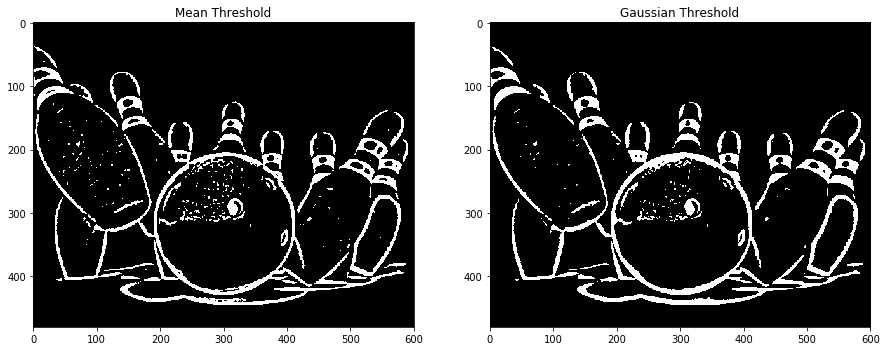

Here we again specify the arguments in similar style as above which but we have to specify additional arguments in order to achieve the adaptive thresholding. If you notice in the code snippet given above the third argument is to compute  the threshold for the current neighbourhood of pixels if we are specifying it as `cv2.ADAPTIVE_THRESH_MEAN_C` we indicate that we want to compute the mean of the neighbourhood  of pixels and treat it as our T value. Next up is our threshold method similarily specfied in the above example that is `cv2.THRESH_BINARY_INV`. 

Next parameter is our neighbourhood size which is supposed to be an odd value indicates how large the neighbourhood of pixels is going to be. The value 11 over here signifies that it is going to examine pixel regions of 11 x 11 over the image  instead of thresholding the image as a whole done in previous method.

Finally we supply a parameter simply called as C. This is an integer value subtracted from the mean. First picture is the result of simply applying mean weighted adaptive thresholding and the second case is application of Gaussian(weighted mean) thresholding instead of simple mean weighted.

#### Task3 : Extraction of coins from an image 

This task is focused on learning how to apply thresholding along with above image processing methods which gets our job done. Here the image is given to you below and your task is to extract the image by applying image processing techniques taught above

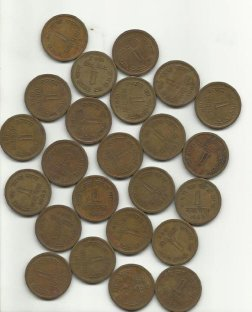


#### Instructions
- The image above shown has been loaded which is named with `coins`.
- Convert the images from BGR format to RGB format and name the variables as `coins_gray`.
- Blur the image according to your choice of method and store it in the variable `blur_cg`.
- Application of thresholding according to your choice of method and inverse it to further use it as a mask. Save these two operations in the tuple named as `(T,th)` and `(T, th_Inverse)`
- Lastly masking the images to extract out the coins shown in the image and store it in the variable named as `binary_cg`
- Plot all the graphs side by side on a subplot
  
  
Output : 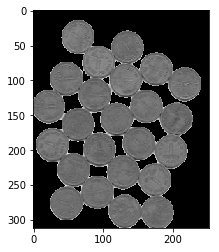

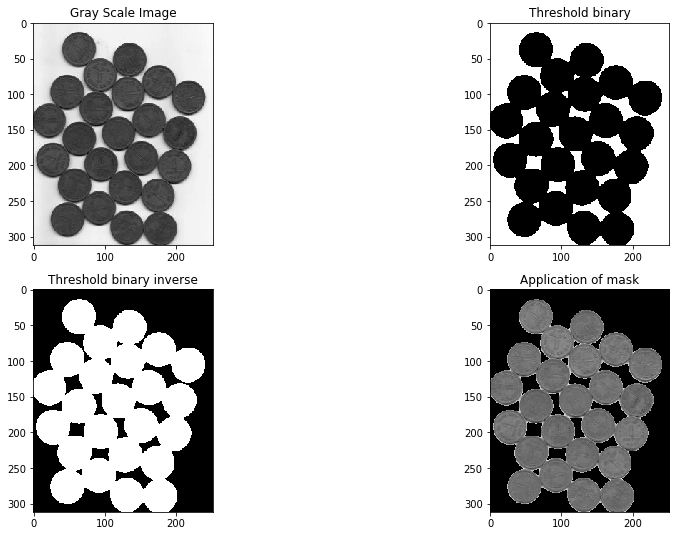

In [203]:

coins = cv2.imread('./images/coins.jpg')

# Code starts from here
coins_gray = cv2.cvtColor(coins, cv2.COLOR_BGR2GRAY) #BGR to RGB conversion
blur_cg = cv2.GaussianBlur(coins_gray, (5,5), 0) #using gaussian blur to make the image bit smoother
(T, th) =cv2.threshold(blur_cg, 155, 255, cv2.THRESH_BINARY) #setting up the threshold value and performing binary thresholding
(T, th_Inverse) = cv2.threshold(blur_cg, 155, 255, cv2.THRESH_BINARY_INV) #setting up the threshold value and performing inverse binary thresholding
binary_cg = cv2.bitwise_and(coins_gray, coins_gray, mask=th_Inverse) # application of mask of inverse binary threshold on grayscale image


fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(15, 9))
ax[0, 0].imshow(coins_gray, 'gray') #showing the image in grayscale mode
ax[0, 0].title.set_text('Gray Scale Image')
ax[0, 1].imshow(th, 'gray') # threshold application done manually 
ax[0, 1].title.set_text('Threshold binary') 
ax[1, 0].imshow(th_Inverse, 'gray') # Inverse of the threshold image above 
ax[1, 0].title.set_text('Threshold binary inverse') 
ax[1, 1].imshow(binary_cg, 'gray') # application of threshold inverse mask on grayscale image.
ax[1, 1].title.set_text('Application of mask') 

#Code ends here



## Chapter 4 : Object Detection

After learning the knowlege about different image processing techniques which will be the basis of many computer vison algorithms and models as they all use varying combination of several numbers of techniques discussed above.


### 4.1 Image gradients

Instead of using values of pixels in an image why can't we gather information or features in image via computing image gradients. Which brings us as to what are image gradients ?

Direction of color changing from one extreme to another (for example black to white transition on a grayscale image) is called as gradient of an image or inshort image gradients.

The gradient on an image is discrete because each pixel is independent and cannot be further split.

The `Image Gradient Vector` is defined as a metric of every individual pixel containing the pixel color changes in both x-axis and y-axis. Suppose f(x, y) records the color of the pixel at location (x, y), the gradient vector of the pixel (x, y) is defined as follows:

$$ \nabla{f(x,y)}= \begin{bmatrix}g_{x} \\ g_{y} \\ \end{bmatrix} = \begin{bmatrix} \frac{\partial f}{\partial x} \\ \frac{\partial f}{\partial y} \end{bmatrix} = \begin{bmatrix}f(x+1, y) -  f(x-1, y)\\ f(x,y+1) - f(x, y-1)\\ \end{bmatrix}$$


The $\frac{\partial f} {\partial x}$ term is the partial derivative on the x-direction, which is computed as the color difference between the adjacent pixels on the left and right of the target, f(x+1, y) - f(x-1, y). Similarly, the $\frac{\partial f} {\partial y}$ term is the partial derivative on the y-direction, measured as f(x, y+1) - f(x, y-1), the color difference between the adjacent pixels above and below the target.

There are two important attributes of an image gradient:
- Magnitude is the L2-norm of the vector, $g= \sqrt{g_{x}^2 + g_{y}^2} $

- Direction is the arctangent of the ratio between the partial derivatives on two directions, $\theta = \text{arctan}(g_x /g_y)$



Since we have discussed about image gradients and how to compute it. Now its time to discuss about where the image gradients are used and helpful.

### 4.2 Histogram of Oriented Gradients (HOG)

It is an effective technique to extract fatures out of the pixel colors for building an object recognition classifier. These HOG decriptors are basically used to describe the structural shape and appearence of an object in an image.

which is followed in three steps -

1) Preprocess the image, including resizing and color normalization.

2) Compute the gradient vector of every pixel, as well as its magnitude and direction.

3) Divide the image into many 8x8 pixel cells. In each cell, the magnitude values of these 64 cells are binned and cumulatively added into 9 buckets of unsigned direction (no sign, so 0-180 degree rather than 0-360 degree; this is a practical choice based on empirical experiments). 

4) Then we slide a 2x2 cells (thus 16x16 pixels) block across the image. In each block region, 4 histograms of 4 cells are concatenated into one-dimensional vector of 36 values and then normalized to have an unit weight. The final HOG feature vector is the concatenation of all the block vectors. It can be fed into a classifier like SVM for learning object recognition tasks.


Since it focuses more one change in image gradients HOGs are excellent descriptors for object classification. However, since HOG captures local intensity gradients and edge directions, it also makes for a good texture descriptor.


We will not be going in details of HOG descriptor but if you would like to know what is in depth working behind HOG descriptors then here is the [source](https://gurus.pyimagesearch.com/lesson-sample-histogram-of-oriented-gradients-and-car-logo-recognition/)

### 4.3 Face Detection using Haar Cascades 

This topic would be exploring the specific application of above techniques learned on the images containing faces. Faces are an important aspect of human body and thereby many computer vison use cases revolves around human faces such as Facial recognition of person, human detection via designing self drive cars etc.


Paul viola and Michael Jones came up with an effective object detection method by using Haar feature based classifiers which decides that whether a given image is positive(face) or negative (not a face). To come to this conclusion a classifier  algorithm needs to be trained on lots of image data with and without faces and come up with some features. 


These features here are know as Haar features which are basically a unqiue set of convolution kernels that primarily detect whether a suitable feature is present on an image or not like for example - 


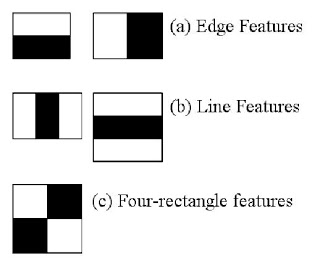

These features are like windows that slides on the whole image  and finally compute a single feature. These features finally give a single value which is obtained as the difference between pixel values containing in the black and white region.

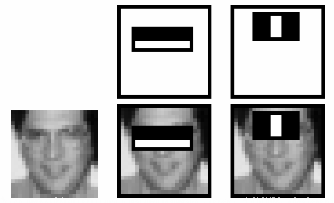


You can see in the above image two good haar features in which first one selectedly focuses to extract the property of the region of eyes where eyes are located in the darker region as compared to nose and cheeks. The second feature captures and relies on the property that eyes are in the darker region as compared to the bridge of the nose. But what if these features are placed on cheeks or on the forehead this makes them irrelevant to some of the face features, also these kernel which are applied on the images are having all possible variation of locations and sizes which results in lot of computation power. 

How do we solve these two shortcomings ?

#### Adaboost

The solution to the above shotcomings is solved by using **Adaboost**. Adaboost works by calculating best threshold for each feature and each image while training process which classfies the image as positive(having face) and classifying the image as negative (not having face).

Since machine learning models have rare scenarios of achieving  100 percent accuracy hence, there will be some misclassified images or say errors made by our algorithm. Adaboost selects those features which are having lower error rates (or we can interpret this as features which classifies positive and negative images accurately. To select these kernels which are accurately classifying the images involves adaboost providing equal weights to all the image firsthand. With each classification the weights of misscalssified images are increased and this process is iterated over and over and new error rates are computed and all these weak classifiers(weak classifier because they alone cannot classify the whole image instead they can classify a region with much better precision) are combined to get a strong classifiers.
This process is continued until the required error rate or accuracy is met as desired.


Intially by normal approach we were able to extract 160000+ features that too on an image of dimension 24 x 24. But after application of Adaboost these features got reduced to just 6000 features which comes as huge gain in terms of computational power needed. But still applying all 6000 features on an image in one single shot is inefficient and we can still make further more improvements to existing plan of our. To solve this researchers introduced something called as **Cascade of Classfiers** which essentially applies features grouped into different stages of classifiers and apply it one-by-one. So if we consider the image which contains faces most of the region is non-face region hence it is better that a simple method check if a window is not a face region. If it comes out to be true then we can discard it in a single shot and do not process it again this approach reduces the computation even further.





### 4.4 Face detection using Haar cascade in OpenCV

In order to detect face we will be using pretrained classifiers (haar cascade classfiers) and with the help of some image processing techniques our algorithm will be detecting the faces or face given in the image.

```python
test_image = cv2.imread('./images/child.jpg', -1) #loading the image
test_image_gray = cv2.cvtColor(test_image, cv2.COLOR_BGR2GRAY) #converting color image to grayscale
haar_cascade_face = cv2.CascadeClassifier('./data/haarcascade_frontalface_default.xml') #haar cascade classifier for face

faces_rects = haar_cascade_face.detectMultiScale(test_image_gray, scaleFactor = 1.2, minNeighbors = 5) #detect mutltiscale method for detecting the face
print('Faces found: ', len(faces_rects))


#placing the rectangle where the face is detected.
for (x,y,w,h) in faces_rects:
     cv2.rectangle(test_image, (x, y), (x+w, y+h), (0, 255, 0), 2)
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
```

Output: Orignal Image - 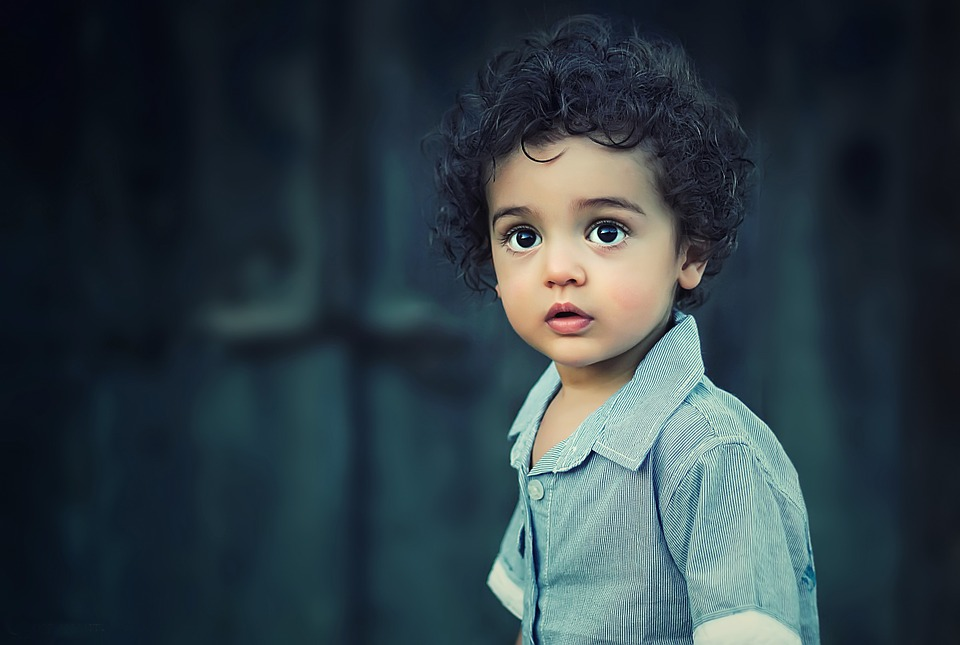

Face Detected - 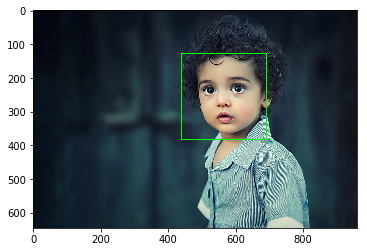


As you know grayscale image are easier to work upon hence we start off with converting the color image into grayscale image.

OpenCV comes with pretrained classfiers for the detection of several objects depending on your use case. These haar cascade classifiers comes in .xml files and contains weights which are highly accurate in detecting specific objects or features in the images. As we have a need to detect the presence of face in our image we will be using `haarcascade_frontalface_default.xml` classifier.

Next up, comes the `detectMultiscale` module of the classifier. This is a functionality provided by OpenCV itself which returns a rectangle with the coordinates `(x, y, w, h)` around the detected face. Notice that there are two additional parameters apart from the image on which this operation is done these are-

- Scale Factor : It deals with the variation in images having several faces where some faces are closer to the camera than other. This scale factor compensates for that variation.

- minNeighbours - This parameter specifies the number of neighbors a rectangle should have to be called a face. 


Finally after locating the face our task comes to loop over all the coordinates which `detectMultiscale` returned and draw rectangles around them using OpenCV. 